<h2 style="color: green;">선형 분류 (Linear Classification)</h2>

**선형 분류 (Linear Classification)와 선형 회귀 (Linear Regression) 차이**

 선형 회귀와 선형 분류 모두 입력 변수와 출력 변수 간의 관계를 모델링하는 데 사용되는 선형 모델입니다.

 선형 회귀는 연속적인 출력 값을 예측하는 회귀 문제를 다룹니다. 즉, 주어진 입력 변수에 대해 연속적인 출력 값을 예측합니다. 예를 들어, 어떤 사람의 나이와 키를 입력으로 주면 이 사람의 몸무게를 예측하는 것이 선형 회귀 문제입니다.

 선형 분류는 이진 분류와 다중 클래스 분류로 구분됩니다. 이진 분류는 입력 값을 두개의 클래스 중 하나로 분류하는 문제를 다룹니다. 예를 들어, 스팸 메일 여부를 판단하는 것이 이진 분류 문제입니다. 다중 클래스 분류는 입력 값을 둘 이상의 클래스 중 하나로 분류하는 문제를 다룹니다. 예를 들어, 손글씨 숫자 인식이 이에 해당합니다.

 선형 회귀와 선형 분류의 차이점은 출력 변수의 성격입니다. 선형 회귀는 연속적인 출력 값을 예측하는 반면, 선형 분류는 이산적인 클래스 값을 예측합니다. 이에 따라, 선형 회귀에는 주로 MSE (Mean Squared Error)와 같은 회귀용 손실 함수를 사용하고, 선형 분류에는 주로 크로스 엔트로피와 같은 분류용 손실 함수를 사용합니다.
 
**선형 분류 (Linear Classification)종류**
+ 로지스틱 회귀 (Logistic Regression)
<br></br>
+ 서포트 벡터 머신 (Support Vector Machine, SVM)
<br></br>
+ 퍼셉트론 (Perceptron)
<br></br>
+ 선형 판별 분석 (Linear Discriminant Analysis, LDA)
<br></br>

**선형 결정 경계 (Linear Decision Boundary)**

 선형 결정 경계(Linear Decision Boundary)란, 입력 데이터를 분류하기 위해 분류 경계를 그리는데 사용되는 선형 함수입니다. 이는 선형 분류 모델에서 가장 간단한 경우입니다.

 선형 결정 경계는 입력 데이터를 평면 상에 투영한 후, 해당 데이터를 분류하기 위한 선을 그리는 것입니다. 이때 분류 경계는 선형이기 때문에 간단하고 빠르게 학습할 수 있습니다. 하지만 입력 데이터가 복잡한 패턴을 가지거나 비선형적인 관계를 가지는 경우 선형 결정 경계는 제대로 분류할 수 없는 한계가 있습니다.
 
 따라서, 비선형적인 관계를 가지는 입력 데이터를 분류하기 위해서는 비선형 결정 경계(Non-linear Decision Boundary)를 사용해야 합니다. 이를 위해서는 보다 복잡한 모델을 사용하거나, 입력 데이터를 고차원으로 변환하는 기법을 사용하는 등의 방법이 있습니다.

## 선형 분류-로지스틱 회귀 (Logistic Regression)

로지스틱 회귀는 분류 문제를 해결하는 모델 중 하나로, 이진 분류(binary classification)에서 많이 사용됩니다. 로지스틱 회귀는 선형 회귀 모델에서 출력 값을 시그모이드 함수(sigmoid function)를 사용하여 0과 1 사이의 값으로 제한한 모델입니다. 즉, 입력변수 x에 대해 0과 1사이의 값인 y를 예측하는 모델입니다.

로지스틱 회귀는 선형 회귀 모델과 마찬가지로 입력변수 x와 가중치w를 곱한 값을 모두 더한 뒤, 시그모이드 함수를 적용하여 y를 예측합니다. 이때, 시그모이드 함수는 입력 값이 크면 1에 가까워지고 작으면 0에 가까워지는 특징을 갖고 있어, 0과 1 사이의 값으로 출력이 제한됩니다.

로지스틱 회귀는 이진 분류 문제에서는 매우 강력한 성능을 보이며, 다중 분류 문제에서도 일부 변형하여 사용할 수 있습니다. 또한, 회귀 분석에서도 종속변수가 0과 1 사이의 값으로 제한되는 경우에 로지스틱 회귀를 사용할 수 있습니다.
<br></br>

+ 입력 변수 (Input variable) : 분류에 사용되는 데이터의 특징(feature)
<br></br>
+ 가중치 (Weights) : 각 입력 변수의 영향력을 나타내는 값
<br></br>
+ 편향 (Bias) : 모델의 적합도를 조정하는 상수항
<br></br>
+ 시그모이드 함수 (Sigmoid function) : 입력 값을 0과 1사이로 변환하는 함수 
<br></br>
+ 로그 손실 함수 (Log loss function) : 모델의 오차를 계산하는 함수
<br></br>

## *임의 데이터로 로지스틱 회귀 실습*

In [71]:
pip install adamp

Note: you may need to restart the kernel to use updated packages.


In [72]:
import torch
import torch.nn as nn
import torch.optim as optim

from adamp import SGDP
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader

In [68]:
# 데이터 셋을 만들기 make_classification 함수를 사용하여 무작위로 데이터셋을 만들기

x, y = make_classification(
    n_samples=3000,  # 생성할 데이터 수
    n_features=5,  # 독립변수 수(라벨)
    n_informative=2,  # 독립변수 수 중에서 실제로 유의미한 의미가 있는 변수 개수
    n_redundant=0,  # 독립변수 중에 다른 독립 변수로부터 파생된 불필요한 독립변수
    n_clusters_per_class=1,  # 클래스 당 클러스트 계수
    random_state=42  # 난수 생성 발생기의 시드값
)

print(x, y)

[[-0.02439857 -0.57540077  1.26796049 -1.42222965 -0.9629849 ]
 [-1.07638119  0.3872175   1.08299994 -0.67379011 -2.65098736]
 [-1.12984986 -0.26922916  1.12735009 -0.82383687 -1.70574586]
 ...
 [-0.53797853  0.26401859 -0.48915618  0.4664446  -1.57451325]
 [ 0.01920342  0.9761859  -0.14717165 -1.51725386  2.31873002]
 [-0.37051336  0.93603022 -0.62133172 -0.23084897  1.66473405]] [0 0 0 ... 0 1 1]


In [56]:
# 데이터 셋을 Train set과 Test set으로 나누기
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("x_train >> ", len(x_train))
print("x_test >> ", len(x_test))
print("y_train >> ", len(y_train))
print("y_test >> ", len(y_test))

x_train >>  2400
x_test >>  600
y_train >>  2400
y_test >>  600


In [57]:
# PyTorch의 Dataset과 DataLoader를 사용하기 위한 Custom Dataset 구현
class MyCumstomDataset(Dataset) :
    def __init__(self, x, y) :
        # 텐서 형태로 변환
        self.x = torch.tensor(x, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
        
    def __getitem__(self, index) :
        return self.x[index], self.y[index]
    # 각 미니배치의 index를 의미한다.
        
    def __len__(self) :
        return len(self.x)
    
    
train_dataset = MyCumstomDataset(x_train, y_train)
test_dataset = MyCumstomDataset(x_test, y_test)

# 데이터 로드 정의
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

for index, (datas, labels) in enumerate(test_loader):
    print(index, datas, labels)

0 tensor([[-0.1814,  0.9541, -0.8362,  0.9478,  1.1666],
        [-1.0747, -0.5975, -0.0673, -0.7824, -1.8099],
        [ 2.0192,  1.4252,  0.7749,  0.9027,  0.9276],
        [ 0.4525,  0.4803,  0.6397,  0.7536,  2.2430],
        [ 1.3994,  0.5470, -0.7957, -0.2365, -1.8805],
        [-0.5218,  1.1701, -1.8481, -1.2085,  1.2183],
        [-0.3237,  0.8182, -0.7245, -0.2665,  1.0007],
        [ 1.8711,  1.4021, -0.5651, -0.8509, -1.1655],
        [ 0.7552,  0.1501,  1.1108,  1.0845,  1.0893],
        [ 0.3990,  2.0237, -0.6619,  1.7075, -0.4431],
        [-0.2678,  0.3786,  1.6651,  1.3227, -0.5773],
        [ 0.4529,  1.2332, -0.6631, -0.2662,  0.8212],
        [ 0.4259, -0.3123,  0.6507, -1.0707, -0.7738],
        [-1.3319,  0.8085, -0.7474,  1.3080,  0.7274],
        [-1.4163,  0.0362,  0.1478, -0.6428, -2.0718],
        [-1.0560,  0.7615,  1.0216, -1.0501,  0.1911],
        [ 1.5948,  0.7361,  1.6070, -1.0155,  1.2248],
        [-0.3499,  1.8803, -0.8156,  0.6496,  0.7292],
        

In [58]:
# 모델 정의
class LogisticRegression(nn.Module) :
    def __init__(self, input_dim) :
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
        
    def forward(self, x) :
        out = self.linear(x)
        out = torch.sigmoid(out)
        
        return out
    
model = LogisticRegression(input_dim=5)
print(model)

LogisticRegression(
  (linear): Linear(in_features=5, out_features=1, bias=True)
)


In [59]:
# 모델 학습시키기 전에 학습에 필요한 Loss function, optimizer 선언
criterion = nn.BCELoss()  # 사용한 이유는 0과 1 분류 이진분류 하기 때문
optimizer = SGDP(model.parameters(), lr=0.01, weight_decay=1e-5, momentum=0.9, nesterov=True)
print(optimizer)

SGDP (
Parameter Group 0
    dampening: 0
    delta: 0.1
    eps: 1e-08
    lr: 0.01
    momentum: 0.9
    nesterov: True
    wd_ratio: 0.1
    weight_decay: 1e-05
)


In [60]:
# train loop 구현
num_epochs = 100

for epoch in range(num_epochs) :
    for inputs, targets in train_loader :
        
        # optimizer 초기화 진행
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))
        loss.backward()
        optimizer.step()
    
    if epoch % 10 == 0 :
        print(f"Epoch : [{epoch+1}/{num_epochs}], Loss : [{loss.item():.4f}]")
        # loss는 텐서값이므로 .item()으로 정수값을 빼준다.

Epoch : [1/100], Loss : [0.2175]
Epoch : [11/100], Loss : [0.1873]
Epoch : [21/100], Loss : [0.2193]
Epoch : [31/100], Loss : [0.3053]
Epoch : [41/100], Loss : [0.2514]
Epoch : [51/100], Loss : [0.3116]
Epoch : [61/100], Loss : [0.1596]
Epoch : [71/100], Loss : [0.2219]
Epoch : [81/100], Loss : [0.2127]
Epoch : [91/100], Loss : [0.1880]


In [61]:
# 평가 코드 작성
#device on GPU인지 혹은 CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device >> ", device)

model.eval()
with torch.no_grad() :
    correct = 0
    total = 0
    for test_inputs, test_targets in test_loader :
        
        #print(test_inputs, test_targets)
        test_input, test_target = test_inputs.to(device), test_targets.to(device)
        outputs_test = model(test_input)
        _, pred_test = torch.max(outputs_test, 1)
        
        #전체 예측할 데이터 수
        total += test_targets.size(0)
        
        #예측한 것 중에 정답
        correct += (pred_test == test_targets).sum().item()
        
    print("Acc >> %.2f%%"%(100 * correct / total))

Using device >>  cpu
Acc >> 48.50%


## *공개되어 있는 데이터를 가지고 로지스틱 회귀 진행 실습*

+ 각 이미지 크기는 28x28 / 흑백 이미지 / 총 10개의 클래스

In [62]:
"""
Fashion-MNIST 라벨 구성 요소
0 - 티셔츠
1 - 바지
2 - 스웨터
3 - 드레스
4 - 코드
5 - 샌들
6 - 셔츠
7 - 운동화
8 - 가방
9 - 앵글 부츠
"""

import torch
import torch.nn as nn
# torch.nn 모듈에는 다양한 신경망 레이어(layer), 손실 함수(loss function), 활성화 함수(activation function) 등이 정의되어 있습니다. 
# nn.Module을 상속하여 사용자 정의 신경망 모델을 만들 수 있습니다.
import torch.optim as optim
import torchvision.datasets as dataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [63]:
# 데이터셋 다운로드하고 Dataloader 생성하기
# 라이브러리에서 해당 파일을 다운로드한다.
train_dataset = dataset.FashionMNIST(root="../data/", train=True, transform=transforms.ToTensor(), download=True)
test_dataset = dataset.FashionMNIST(root="../data/", train=False, transform=transforms.ToTensor(), download=True)

print(train_dataset)
print(test_dataset)

# train loader test loader 설정
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ../data/
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ../data/
    Split: Test
    StandardTransform
Transform: ToTensor()


In [64]:
# 모델 정의
# LogisticRegression에서 nn.Module을 사용하겠다.
class LogisticRegression(nn.Module) :

    def __init__(self, input_size, num_classes) :
        #이미지 사이즈는 28x28 -> input_size
        #라벨 종류 -> num_classes
        super(LogisticRegression, self).__init__()
        #클래스 내 생성자가 부모 클래스인 nn.Module의 생성자를 가져오는 코드
        self.linear = nn.Linear(input_size, num_classes)
        #nn.Module안에 nn.Linear이라는 함수를 가져와서 linear 모델을 구성한다.
        
    def forward(self, x) :
        out = self.linear(x)
        return out
    
# 하이퍼 파라미터 설정
input_size = 28 * 28
num_classes = 10
num_epochs = 10
lr = 0.001

# train_dataset은 6만개로 이루어져있다 -> batch를 100개로 DataLoader 설정하였으므로
# len(train_loader) -> 600개
total_step = len(train_loader)

# 모델, Loss, 옵티마이저 정의
model = LogisticRegression(input_size=input_size, num_classes=num_classes)
# print(model)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

# device setting
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device >> ", device)

model.to(device)

Using device >>  cpu


LogisticRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

Epoch [1 / 10], step [600/600], Loss : 0.4642
Epoch [2 / 10], step [600/600], Loss : 0.5707
Epoch [3 / 10], step [600/600], Loss : 0.6430
Epoch [4 / 10], step [600/600], Loss : 0.3476
Epoch [5 / 10], step [600/600], Loss : 0.4560
Epoch [6 / 10], step [600/600], Loss : 0.3918
Epoch [7 / 10], step [600/600], Loss : 0.4663
Epoch [8 / 10], step [600/600], Loss : 0.4642
Epoch [9 / 10], step [600/600], Loss : 0.4963
Epoch [10 / 10], step [600/600], Loss : 0.5345


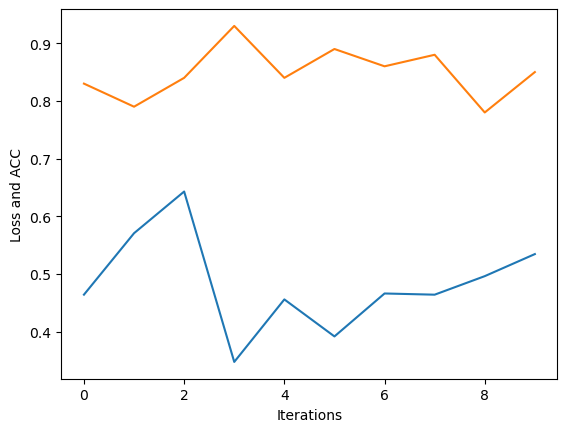

In [69]:
# train loop
loss_list = []
acc_list = []

# 배치 한개가 학습되는 총 개수 600개 순회를 epoch단위로 지정
for epoch in range(num_epochs) :
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(train_loader) :
        # 데이터 로드
        images = images.reshape(-1, input_size).to(device)
        """
        images.reshape(-1, input_size)에서 -1은 해당 차원의 크기를 자동으로 계산하라는 의미입니다.
        input_size는 이미지의 차원을 나타내는 값입니다. 따라서 images.reshape(-1, input_size)는 이미지 데이터를 
        2차원 행렬에서 1차원 벡터로 변환하는 역할을 수행합니다.
        """
        labels = labels.to(device)
        
        # 순전파 및 Loss 계산
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # 역전파 및 가중치 업데이트
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # 로그 출력
        # 100개당 한번만 출력하도록 설정
        if (i+1) % 600 == 0 :
            loss_list.append(loss.item())
            #여기서 torch.max는 인자값중에 가장 큰 데이터값과 그에 해당하는 인덱스를 반환
            _, predicted = torch.max(outputs.data, 1)
            # outputs.data는 학습된 모델의 텐서 결과이며 1은 선택할 텐서 차원이다
            # 즉 첫번째 차원에서 outputs.data중에 가장 큰 값을 predicted 할당하는 것이다.
            # 학습된 모델 outputs.data안에는 분류된 확률 또는 점수가 들어있다.
            
            # 전체 예측할 데이터 수
            total += labels.size(0)
            # 미니배치의 샘플 수

            # 예측한 것 중에 정답
            correct += (predicted == labels).sum().item()
            acc_list.append(correct / total)
            
            print("Epoch [{} / {}], step [{}/{}], Loss : {:.4f}".format(
                epoch+1, num_epochs, i+1, total_step, loss.item(), acc_list[-1]))
            # acc_list[-1]는 배열안에 가장 최근값을 의미
            
# 손실 및 정확도 그래프 출력
plt.plot(loss_list, label="Train loss")
plt.plot(acc_list, label="Train acc")
plt.xlabel("Iterations")
plt.ylabel("Loss and ACC")
plt.show()

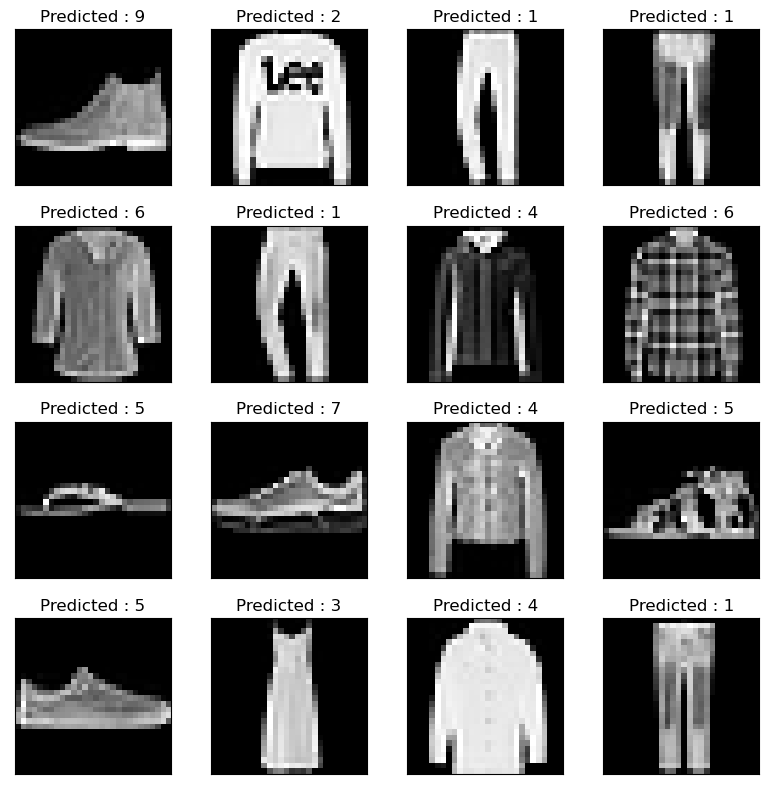

In [70]:
# 테스트 시각화
import numpy as np

"""
batch_size만큼 이미지가 넘어오므로 16개 미만으로 설정하면 한개의 배치로 예측할 때 이미지가 다 못넘어온다.
16개 이상으로 설정해야한다.
"""

# 테스트 이미지 가져오기
dataiter = iter(test_loader)

# test_loader를 이터레이터 객체인 dataiter로 변환합니다.
images, labels = dataiter.__next__()

# dataiter를 사용하여 test_loader에서 순차적으로 데이터를 가져올 수 있습니다.
images_temp = images.reshape(-1, 28 * 28)
# print(images_temp.shape)

# 모델 예측
model.eval()
outputs_temp = model(images_temp)
_, predicted_test =  torch.max(outputs_temp.data,1)
# print(predicted_test)

# 이미지와 예측값 시각화
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(8,8), subplot_kw={'xticks' : [], 'yticks' : []})
for i, ax in enumerate(axes.flat) :
    ax.imshow(np.squeeze(images[i].reshape(28,28)), cmap='gray')
    ax.set_title(f"Predicted : {predicted_test[i].item()}")
    
plt.tight_layout()
plt.show()

## 로지스틱 회귀 모델의 한계의 한계

로지스틱 회귀 모델은 선형 결정 경계를 사용하여 이진 분류 문제를 해결하는 데 주로 사용됩니다.이 모델은 기본적으로 입력 특성과 가중치의 선형 조합에 시그모이드 함수를 적용하여 0과 1 사이의 확률값을 출력합니다. 그러나 이 모델은 일부 한계가 있습니다.

+ 첫째, 로지스틱 회귀 모델은 선형 결정 경계를 사용하기 때문에, 선형적으로 분리되지 않은 데이터셋에서는 제대로 작동하지 않습니다. 이런 경우에는 다른 비선형 모델을 사용해야 합니다.
<br></br>

+ 둘째, 로지스틱 회귀 모델은 모델링할 수 있는 관계가 선형적인 경우에만 사용할 수 있습니다. 따라서 입력과 출력 간의 비선형적인 관계가 있는 문제의 경우에는 다른 모델을 사용해야 합니다.
<br></br>

## 로지스틱 회귀 모델의 한계 해결 방법

+ 첫째, 로지스틱 회귀 모델을 다른 비선형 모델로 대체할 수 있습니다. 예를 들어, 다층 퍼셉트론(MLP)과 같은 신경망 모델은 비선형성을 가지므로, 비선형적인 관계를 모델링하기에 더 적합합니다.
<br></br>

+ 둘째, 로지스틱 회귀 모델에 다항식 항을 추가하여 비선형적인 관계를 모델링할 수 있습니다. 이를 다항 로지스틱 회귀 모델(polynomial logistic regression)이라고 합니다.
<br></br>

+ 셋째, 커널 트릭(kernel trick)을 사용하여 로지스틱 회귀 모델을 비선형 모델로 확장할 수 있습니다. 이를 커널 로지스틱 회귀 모델(kernel logistic regression)이라고 합니다.
<br></br>

+ 넷째, 정규화(regularization)를 사용하여 모델의 복잡도를 제어할 수 있습니다. 이를 L1 또는 L2 정규화라고 합니다. 이러한 정규화 기법은 모델이 과적합(overfitting)되는 것을 방지하여 일반화 성능을 향상시킵니다.
<br></br>

+ 다섯째, 앙상블(ensemble) 기법을 사용하여 로지스틱 회귀 모델을 개선할 수 있습니다. 이를 로지스틱 회귀 앙상블(logistic regression ensemble)이라고 합니다.

    **로지스틱 회귀 앙상블 (ensemble)**

    로지스틱 회귀 앙상블은 여러 개의 로지스틱 회귀 모델을 조합하여 더 나은 예측 성능을 달성하는 기법입니다. 일반적으로 로지스틱 회귀 앙상블은 여러 개의 로지스틱 회귀 모델을 만들고, 각 모델의 예측을 조합하여 최종 예측을 수행합니다.

    로지스틱 회귀 앙상블은 개별 로지스틱 회귀 모델보다 더 나은 성능을 발휘할 수 있습니다. 이는 다양한 이유로 인해 발생합니다. 첫째, 여러 개의 모델이 예측한 결과를 조합하여 더욱 정확한 예측을 수행할 수 있습니다. 둘째, 각 모델은 데이터의 일부를 보고 예측을 수행하므로, 앙상블을 통해 전체 데이터를 더 잘 활용할 수 있습니다. 셋째, 각 모델은 서로 다른 특징을 강조하므로, 앙상블을 통해 전체적으로 다양한 특징을 고려할 수 있습니다.

    로지스틱 회귀 앙상블은 다른 알고리즘의 앙상블과 마찬가지로 매우 강력한 예측 성능을 발휘할 수 있습니다. 그러나 앙상블 모델을 구성하고 훈련하기 위해서는 더 많은 계산이 필요하고, 모델의 구성이 복잡해질 수 있으므로, 상황에 따라서는 이를 고려해야 합니다.

## *로지스틱 회귀 앙상블 실습*

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
# 데이터셋, 데이터 로더 생성
dataset = FashionMNIST(root="../data", train=True, transform = ToTensor(), download=False)
train_set, val_set = train_test_split(dataset, test_size=0.1, random_state=777)

train_loader = DataLoader(train_set, batch_size=100, shuffle=True)
test_loader = DataLoader(val_set, batch_size=100, shuffle=False)

In [5]:
# 모델 선언
class LogistRegression(nn.Module) :
    def __init__(self, input_size, num_classes) :
        super(LogistRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, x) :
        out = self.linear(x)
        
        return out

In [6]:
# 하이퍼 파라미터 설정
input_size = 28 * 28
num_classes = 10
num_epoch = 10
lr = 0.001
num_models = 5  # 앙상블에 사용할 모델 개수

In [7]:
# 앙상블
models = [LogistRegression(input_size, num_classes)for _ in range(num_models)]
print(models)

[LogistRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
), LogistRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
), LogistRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
), LogistRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
), LogistRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)]


In [9]:
# 모델, 손실함수, 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizers = [optim.SGD(model.parameters(), lr=lr) for model in models]
print(optimizers)

[SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
), SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
), SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
), SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
), SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)]


In [10]:
#train loop
for epoch in range(num_epoch) :
    for i, (images, labels) in enumerate(train_loader) :
        #데이터 로드
        images = images.reshape(-1, input_size)
        labels = labels
        #print(images, labels)
        
        #순전파 및 손실 계산
        for j in range(num_models) :
            outputs = models[j](images)
            loss = criterion(outputs, labels)
            
            #역전파 및 가중치 업데이트
            optimizers[j].zero_grad()
            loss.backward()
            optimizers[j].step()

    #검증 코드 추가
    with torch.no_grad() :
        total, correct = 0, 0
        for images, labels in test_loader :
            images = images.reshape(-1, input_size)
            outputs = torch.zeros(images.size()[0], num_classes)

            #앙상블 모델의 예측값 더하기
            for j in range(num_models) :
                outputs += models[j](images)

                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_acc = 100 * correct / total
        print(f"Epoch [{epoch+1} / {num_epoch}], Val ACC >> {val_acc:.2f}%")


Epoch [1 / 10], Val ACC >> 75.86%
Epoch [2 / 10], Val ACC >> 76.38%
Epoch [3 / 10], Val ACC >> 76.83%
Epoch [4 / 10], Val ACC >> 77.22%
Epoch [5 / 10], Val ACC >> 77.47%
Epoch [6 / 10], Val ACC >> 77.73%
Epoch [7 / 10], Val ACC >> 77.97%
Epoch [8 / 10], Val ACC >> 78.20%
Epoch [9 / 10], Val ACC >> 78.44%
Epoch [10 / 10], Val ACC >> 78.77%


## 결정 경계 (Decision Boundary) 개념과 로지스틱 회귀의 결정 경계 구현 방법

결정 경계(Decision Boundary)란, 분류기가 분류한 두 클래스를 나누는 경계선을 의미합니다. 로지스틱 회귀는 이진 분류 모델로서, 입력 데이터의 특징값(feature)을 바탕으로 해당 데이터가 어느 클래스에 속하는 지를 판단하는 모델입니다. 로지스틱 회귀 모델의 학습 결과는 가중치(weight)와 편향(bias)값이며, 이를 사용하여 결정 경계를 계산할 수 있습니다.

로지스틱 회귀의 결정 경계는 결정 경계 함수(Decision Boundary Function)로 나타낼 수 있으며, 이 함수는 입력 데이터를 분류하는 임계값(threshold)을 지정하여 결정 경계를 나타냅니다. 이 함수는 일반적으로 시그모이드 함수(Sigmoid Function)를 사용합니다.

## *로지스틱 회귀의 결정 경계 실습*

In [11]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# 임의의 데이터 생성
x = torch.randn(100, 2)
y = ((x[:,0] > 0.5) & (x[:,1] > 0.5)).float()

print(x,y)

tensor([[ 8.0558e-01, -1.2411e+00],
        [ 3.4001e-01, -2.0214e+00],
        [-3.1190e-01, -1.5267e-03],
        [-3.5029e-02, -2.6319e-01],
        [ 1.4575e+00, -9.7437e-01],
        [-1.8668e+00,  1.7902e-01],
        [ 2.0999e-01, -4.5661e-01],
        [ 2.2500e-01,  2.3622e+00],
        [-1.4626e+00, -2.0249e-01],
        [ 6.7444e-01,  1.9910e+00],
        [ 1.5829e+00, -5.6866e-01],
        [ 1.6571e-01,  4.4497e-01],
        [ 1.0090e+00,  2.9097e-01],
        [-4.0778e-02,  1.6037e+00],
        [-1.3037e+00, -4.0557e-01],
        [-2.3900e-01, -1.8576e+00],
        [ 1.3416e+00,  1.9380e+00],
        [ 9.1236e-01,  9.9430e-01],
        [ 7.0290e-01, -6.2423e-01],
        [ 2.6020e+00,  3.7794e-01],
        [-8.1118e-03, -1.8068e+00],
        [ 1.2300e+00,  1.6186e-01],
        [ 4.4089e-01,  1.6144e-01],
        [-4.5480e-02,  8.4003e-01],
        [ 1.6757e-01, -3.5940e-01],
        [ 2.9643e-01, -5.4986e-01],
        [-3.9489e-01,  7.0468e-01],
        [ 4.5915e-01,  4.038

In [14]:
# 모델 정의
class LogisticRegression(torch.nn.Module) :
    def __init__(self, input_dim, output_dim) :
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        
    def forward(self, x) :
        out = self.linear(x)
        fc = F.sigmoid(out)
        return fc
    
model = LogisticRegression(input_dim=2, output_dim=1)
print(model)

LogisticRegression(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


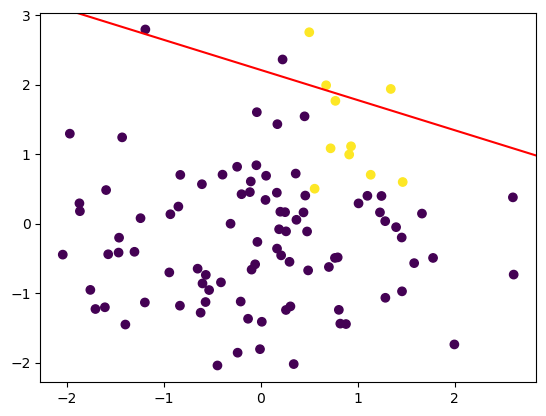

In [15]:
# 모델 학습, 결정 경계 그리기
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in range(1000) :
    y_pred = model(x)
    loss = criterion(y_pred.squeeze(), y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
# 결정 경계 그리기
plt.scatter(x[:,0], x[:,1], c=y)
x_min, x_max = plt.xlim()  #x좌표의 최대값, 최소값
y_min, y_max = plt.ylim()  #y좌표의 최대값 최소값

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
#xx,yy는 x,y의 좌표를 기반으로 격자 포인트 생성

z = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype = torch.float32)).detach().numpy()
#torch.tensor 변경하고 ravel() -> 2차원 배열 1차원으로 평면화 -> .detach().numpy() 예측값을 넘파이 형태로 변환 -> 모델 전달

z = z.reshape(xx.shape)
plt.contour(xx, yy, z, levels=[0.5], colors='r')
# plt.contour() -> xx,yy 격자에 대응하는 결정경계 그리는 함수
plt.show()